# projet pour la posterité

#### ce projet a pour but d'envoyer un mail au personne participant au projet " pour la posterité" ou aussi appelé "Qbit". le but du projet est d'envoyé un mail a chaque personne participantes, et de leur dire si ils sont selectionner ou non. ensuite le programme ficher le nom de la personne selectionnée et envera la clé de chiffrement a 3 personne au hassard. dans le but d'avoir le nom de la personne si jamais elle venait a ne pas remplire son devoir

## architecture du projet :

###
- envoie de mail
- recuperation des nom et tirage au sort
- chffremment d'un fichier
- tout

### email

truc gmail


In [1]:
from email.message import EmailMessage # for creating email
import smtplib # for sending email
import ssl # for secure connection


In [2]:
destinataire = "link12541254@gmail.com"
sujet = "Projet - Pour la postérité: tirage au sort"
message = "Ceci est un test 2"

def envoie_email(destinataire,sujet, message):
    expediteur = "qbit1254@gmail.com"
    mot_de_passe = "ychh qadg dehb xuxu" 
    em = EmailMessage()
    em['From'] = expediteur
    em['To'] = destinataire
    em['Subject'] = sujet
    em.set_content(message)

    context = ssl.create_default_context()
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as smtp:
        smtp.login(expediteur, mot_de_passe)
        smtp.sendmail(expediteur, destinataire, em.as_string()) 
    
    

In [3]:
import os
import smtplib
import ssl
from email.message import EmailMessage

def envoie_email_jointe(destinataire, sujet, message, attachment_path=None):
    expediteur = "qbit1254@gmail.com"
    mot_de_passe = "ychh qadg dehb xuxu"  # <-- App Password conseillé si 2FA activée
    
    em = EmailMessage()
    em["From"] = expediteur
    em["To"] = destinataire
    em["Subject"] = sujet
    em.set_content(message)
    
    # Si un chemin de fichier est fourni, on joint le fichier à l'email
    if attachment_path is not None:
        # Lecture du fichier en binaire
        with open(attachment_path, "rb") as f:
            file_data = f.read()
            # Récupérer le nom du fichier (sans le chemin)
            file_name = os.path.basename(attachment_path)
        
        # Ajout de la pièce jointe dans l'objet EmailMessage
        em.add_attachment(
            file_data,
            maintype="application",
            subtype="octet-stream",
            filename=file_name
        )
    
    # Création d'un contexte SSL pour sécuriser la connexion
    context = ssl.create_default_context()
    
    # Connexion au serveur SMTP en SSL
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as smtp:
        smtp.login(expediteur, mot_de_passe)
        smtp.sendmail(expediteur, destinataire, em.as_string())




In [4]:
file_path = r"C:\Users\Axel\OneDrive - unige.ch\0moi\0\emplacement.txt"

with open(file_path, 'r') as file:
    rows = file.readlines()

# Remove any trailing newline characters
placements = [row.strip() for row in rows]



In [5]:
placements

["boite au lettre de l'AEP. dans le hall de l'Ã©cole de physique, Ã\xa0 cotÃ© de la loge. la boite en bas Ã\xa0 droite.",
 "loge de sciences 2, demander le colis laissÃ© par l'aesc pour l'association des etudiants en sciences pharmacieutique.",
 'toilette homme de sciences 1, au premiere etage. au fond dans la salle serveur.']

In [6]:
key="123"
key_list=[1,2,3]
ieme_key=0
ieme_place=0
def corps(nom, tag):
    if not tag in ["clone","clé","normal"]:
        raise ValueError("Tag inconnu")
    


    if tag == "normal":
        return f"""\
        Bonjour {nom},

        J'espère que vous allez bien. Je suis désolé de vous anoncer que vous n'avez pas été sélectionné pour Cloner votre chibre. 
        ni pour être detenteur d'une partie de la clé.



        Bien cordialement,

        L'Organisation du Projet Qbit

        """
    
    if tag == "clé":
        return f"""\
        Bonjour {nom},

        J'espère que vous allez bien. Je suis désolé de vous anoncer que vous n'avez pas été sélectionné pour Cloner votre chibre. 
        MAIS pour être detenteur d'une partie de la clé.

             Vous posédé la partie numero {ieme_key+1} de la clé.votre clé est : {key_list[ieme_key]}

        celle si devra être gardé en sécurité et n'être revelé que si apres une semaine, le clone n'as pas été recuperé. ou si le clone n'as pas été utilisé rendu dans les temps.



        Bien cordialement,

        L'Organisation du Projet Qbit

        """
    
    if tag == "clone":
        return f"""\
        Bonjour {nom},

        J'espère que vous allez bien. Je suis heureux de vous anoncer que vous AVEZ  été sélectionné pour Cloner votre chibre.

        Nous nous rejouissons de jouer avec :)

        en attendant il faut que vous ayez le chercher dans un delais de UNE SEMAINE a l'adresse suivante : 

            -{placements[ieme_place]}

         si le packet n'est pas recuperer d'ici là, votre identité sera revelé a tous les participants.
         idem dans le cas ou vous ne rendez pas le clone dans les temps.


        



        Bien cordialement et bon courage,

        L'Organisation du Projet Qbit

        P.S. Si vous avez besoin d'aide pour le moulage: fgirl.ch

        """

In [7]:
#envoie_email(destinataire,sujet, corps("bob","clone"))

In [8]:
#envoie_email("axel.grand@etu.unige.ch",sujet, message)

# cryptage

## clé : creation de la clé

In [9]:
from cryptography.fernet import Fernet

def generate_key_and_save(filename_key: str):
    """
    Génère une clé Fernet et la sauvegarde dans un fichier binaire.
    """
    key = Fernet.generate_key()
    with open(filename_key, 'wb') as key_file:
        key_file.write(key)
    print(f"Clé générée et sauvegardée dans {filename_key}")

generate_key_and_save("ma_cle.key")


Clé générée et sauvegardée dans ma_cle.key


## cryptage

#### exemple

In [10]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()
print(key)

f = Fernet(key)

token = f.encrypt(b"my deep dark secret")

token
b'...'

f.decrypt(token)
b'my deep dark secret'

b'bPB7B_x_dhxHSoJwBeGZEBS_W0r03mv-9z_Gxh_zQi0='


b'my deep dark secret'

#### mon code

In [11]:
from cryptography.fernet import Fernet

def create_key():
    key = Fernet.generate_key()
    with open("ma_cle.key", "wb") as key_file:
        key_file.write(key)

def load_key():
    return open("ma_cle.key", "rb").read()


Final_execution=False   
def char_to_3_list(char):
    list=[]
    list.append(char[0:len(char)//3])
    list.append(char[len(char)//3:2*len(char)//3])
    list.append(char[2*len(char)//3:len(char)])
   
    if Final_execution==False:
        return list
    if Final_execution==True:
        global NB_choisi_pour_clone
        NB_choisi_pour_clone=3
        return list



def encrypt_file(file_name):
    key = load_key()
    fernet = Fernet(key)
    with open(file_name, "rb") as file:
        file_data = file.read()
    encrypted_data = fernet.encrypt(file_data)
    with open(file_name[:-4]+str("_encrypted.txt"), "wb") as file:
        file.write(encrypted_data)
        
        
def decrypt_file(file_name):
    key = load_key()
    fernet = Fernet(key)
    with open(file_name, "rb") as file:
        encrypted_data = file.read()
    decrypted_data = fernet.decrypt(encrypted_data)
    with open(file_name[:-4]+str("_decrypted.txt"), "wb") as file:
        file.write(decrypted_data)

def decrypt_file_with_splited3_key(file_name,key1,key2,key3):
    key = key1+key2+key3
    fernet = Fernet(key)
    with open(file_name, "rb") as file:
        encrypted_data = file.read()
    decrypted_data = fernet.decrypt(encrypted_data)
    with open(file_name[:-4]+str("_decrypted.txt"), "wb") as file:
        file.write(decrypted_data)



In [12]:
key_list=char_to_3_list(load_key())

In [13]:
key=load_key()
key==key_list[0]+key_list[1]+key_list[2]

True

## recuperation des emails

In [14]:
def all_elements_unique(lst):
    if not len(lst) == len(set(lst)):
        raise ValueError("The email addresses are not unique.")


    

# Example usage
example_list = [1, 2, 3, 4, 5]
all_elements_unique(example_list)  # Output: True

example_list = [1, 2, 2, 4, 5]
#all_elements_unique(example_list)  # Output: False

In [15]:
import pandas as pd
my_csv_file_name = "Formulaire sans titre (réponses) - Réponses au formulaire 1.csv"
# Read the CSV file
df = pd.read_csv(my_csv_file_name)

# Convert the dataframe to a list of lists
data_list = df.values.tolist()
dicto_nom_email = {}


def get_email_list(data_list):
    email_list = []
    for i in range(len(data_list)):
        email_list.append(data_list[i][3])
        dicto_nom_email[data_list[i][3]] = data_list[i][1]
    all_elements_unique(email_list)
    return email_list

email_list=get_email_list(data_list)

## execution du programme

In [16]:
# just pour break quand on lance tout le jupyter

def stoop(email)
    ff

SyntaxError: expected ':' (3220588454.py, line 3)

In [17]:
import random
import os
import tqdm # for progress bar

NB_choisi_pour_clé = 3 # la clé de cryptage est de base coupé en 3. si on veut changer ce nombre il faut changer la fonction char_to_3_list
NB_choisi_pour_clone=1




In [ ]:
# Juste un exemple, c'est pas les vrai nom
email_list=get_email_list(data_list)

the_chosen=random.sample(email_list,NB_choisi_pour_clé+NB_choisi_pour_clone)
the_chosen

['sergejlaub5@gmail.com',
 'axel1254@gmail.com',
 'drinimarchese@gmail.com',
 'moretti.theo@gmail.com']

In [18]:
file_path = r"C:\Users\Axel\OneDrive - unige.ch\0moi\0\emplacement.txt"

with open(file_path, 'r') as file:
    rows = file.readlines()

# Remove any trailing newline characters
placements = [row.strip() for row in rows]



In [ ]:
placements

["boite au lettre de l'AEP. dans le hall de l'Ã©cole de physique, Ã\xa0 cotÃ© de la loge",
 "loge de sciences 2, demander le colis laissÃ© par l'aesc pour l'association des etudiants en pharmacie",
 "salle d'etude"]

In [ ]:
### A ACTIVé QUE SI TU SAIS CE QUE TU FAIS
Final_execution=False # doit être mis a True pour envoyer les emails et SUPPRIMER LE FICHIER CONTENANT LA CLE
send=False # doit être mis a True pour envoyer les emails
###

t=0
ieme_key=0
ieme_place=0



####################################################################################################
print("debut de l'excution du programe : Final_execution set sur "+str(Final_execution))

if Final_execution==False:
    print("ATTENTION: Final_execution est sur True, le fichier contenant la clé va être supprimé")

print("creation de la clé")
create_key()
print("clé créée")
print("chargement de la clé")
key=load_key()
key_list=char_to_3_list(load_key()) # on divise la clé en 3 pour la sécurité

if key==key_list[0]+key_list[1]+key_list[2]:
    print("découpage de la clé effectué avec succès")
else:
    raise ValueError("Erreur lors du découpage de la clé")



print("chargement des emails")
email_list=get_email_list(data_list)
print("emails chargés")
print("tirage au sort")

the_chosen=random.sample(email_list,NB_choisi_pour_clé+NB_choisi_pour_clone)

print("tirage au sort effectué")
print("envoie des emails")
winners=[] 

for email_adresse in tqdm.tqdm(email_list):
    nom=dicto_nom_email[email_adresse]

    if email_adresse in the_chosen:
        if t<NB_choisi_pour_clone:
            #envoie email clone
            
            if send==True:
                envoie_email(email_adresse,sujet, corps(nom,"clone"))
            else:
                print("clone: "+str(email_adresse))
                print(corps(nom,"clone"))
            t=t+1
            ieme_place=ieme_place+1
            winners.append([nom,email_adresse])
            
        else:
            #envoie email clé
            if send==True:
                envoie_email(email_adresse,sujet, corps(nom,"clé"))
            else:
                print("clé: "+str(email_adresse))
                print(corps(nom,"clé"))
            ieme_key=ieme_key+1
    else:
        #envoie email normal
        if send==True:
            envoie_email(email_adresse,sujet, corps(nom,"normal"))
        else:
            print("normal: "+str(email_adresse))
            print(corps(nom,"normal"))

# Define the file path
output_file_path = "winners.txt"

# Open the file in write mode
with open(output_file_path, 'w') as file:
    # Write the names and email addresses to the file
    for i in range(NB_choisi_pour_clone):
  
        file.write(f"{winners[i][0]},{winners[i][1]}\n")

print(f"Data written to {output_file_path}")

encrypt_file(output_file_path)

if Final_execution==True:
    os.remove("ma_cle.key")
    os.remove(output_file_path)
    print("fichiers supprimés")

print("fin de l'excution du programe")

#### envoie du fichier encrypter
sujet = "Projet - Pour la postérité: winners_encrypted"
piece_jointe = "winners_encrypted.txt"
message = "voici le fichier encrypté contenant le nom de la personne ayant été choisu pour utiliser la clone, vous pourez le decrypter avec les 3 morceau de la clé , et en executant le programme decode.py qui ce trouve sur le github du projet"

z=0
for email_adresse in tqdm.tqdm(email_list):

    if send==True:
        envoie_email_jointe(email_adresse, sujet, message, attachment_path=piece_jointe)
    else:
        if z==0:
            envoie_email_jointe("link12541254@gmail.com", sujet, message, attachment_path=piece_jointe)
            z=1
        print(str(email_adresse))
        print("sujet :"+str(sujet))
        print("message :"+str(message))




    
    
 
      
        
    



debut de l'excution du programe : Final_execution set sur False
ATTENTION: Final_execution est sur True, le fichier contenant la clé va être supprimé
creation de la clé
clé créée
chargement de la clé
découpage de la clé effectué avec succès
chargement des emails
emails chargés
tirage au sort
tirage au sort effectué
envoie des emails


100%|██████████| 24/24 [00:00<?, ?it/s]


normal: bast.lacave@gmail.com
        Bonjour Bastien ,

        J'espère que vous allez bien. Je suis désolé de vous anoncer que vous n'avez pas été sélectionné pour Cloner votre chibre. 
        ni pour être detenteur d'une partie de la clé.



        Bien cordialement,

        L'Organisation du Projet Qbit

        
normal: axel1254@gmail.com
        Bonjour axel,

        J'espère que vous allez bien. Je suis désolé de vous anoncer que vous n'avez pas été sélectionné pour Cloner votre chibre. 
        ni pour être detenteur d'une partie de la clé.



        Bien cordialement,

        L'Organisation du Projet Qbit

        
normal: mail@ferrer.re
        Bonjour Sebastian,

        J'espère que vous allez bien. Je suis désolé de vous anoncer que vous n'avez pas été sélectionné pour Cloner votre chibre. 
        ni pour être detenteur d'une partie de la clé.



        Bien cordialement,

        L'Organisation du Projet Qbit

        
normal: kenji@tanaka.ninja
        Bonjour K

100%|██████████| 24/24 [00:02<00:00,  8.82it/s]

bast.lacave@gmail.com
sujet :Projet - Pour la postérité: winners_encrypted
message :voici le fichier encrypté contenant le nom de la personne ayant été choisu pour utiliser la clone, vous pourez le decrypter avec les 3 morceau de la clé , et en executant le programme decode.py qui ce trouve sur le github du projet
axel1254@gmail.com
sujet :Projet - Pour la postérité: winners_encrypted
message :voici le fichier encrypté contenant le nom de la personne ayant été choisu pour utiliser la clone, vous pourez le decrypter avec les 3 morceau de la clé , et en executant le programme decode.py qui ce trouve sur le github du projet
mail@ferrer.re
sujet :Projet - Pour la postérité: winners_encrypted
message :voici le fichier encrypté contenant le nom de la personne ayant été choisu pour utiliser la clone, vous pourez le decrypter avec les 3 morceau de la clé , et en executant le programme decode.py qui ce trouve sur le github du projet
kenji@tanaka.ninja
sujet :Projet - Pour la postérité: winners_

# script sans biais

In [30]:
import random
import os
import tqdm # for progress bar

NB_choisi_pour_clé = 3 # la clé de cryptage est de base coupé en 3. si on veut changer ce nombre il faut changer la fonction char_to_3_list
NB_choisi_pour_clone=1


In [31]:
### envoie sans biais

### A ACTIVé QUE SI TU SAIS CE QUE TU FAIS
Final_execution=True # doit être mis a True pour envoyer les emails et SUPPRIMER LE FICHIER CONTENANT LA CLE
send=True # doit être mis a True pour envoyer les emails
###
sujet = "Projet - Pour la postérité: tirage au sort"
t=0
ieme_key=0
ieme_place=0



####################################################################################################
print("debut de l'excution du programe : Final_execution set sur "+str(Final_execution))

if Final_execution==False:
    print("ATTENTION: Final_execution est sur True, le fichier contenant la clé va être supprimé")

print("creation de la clé")
create_key()
print("clé créée")
print("chargement de la clé")
key=load_key()
key_list=char_to_3_list(load_key()) # on divise la clé en 3 pour la sécurité

if key==key_list[0]+key_list[1]+key_list[2]:
    print("découpage de la clé effectué avec succès")
else:
    raise ValueError("Erreur lors du découpage de la clé")



print("chargement des emails")
email_list=get_email_list(data_list)
print("emails chargés")
print("tirage au sort")

#randomisation de la liste des email

random.shuffle(email_list)
print("tirage au sort effectué")
print("envoie des emails")
winners=[] 
interator=0



for email_adresse in tqdm.tqdm(email_list):
    nom=dicto_nom_email[email_adresse]




    if interator<NB_choisi_pour_clone:
        #envoie email clone

        if send==True:
            envoie_email(email_adresse,sujet, corps(nom,"clone"))
        else:
            print("clone: "+str(email_adresse))
            print(corps(nom,"clone"))
        
        winners.append([nom,email_adresse])
        ieme_place=ieme_place+1
    elif NB_choisi_pour_clone<=interator<NB_choisi_pour_clé+NB_choisi_pour_clone:

        #envoie email clé
        if send==True:
            envoie_email(email_adresse,sujet, corps(nom,"clé"))
        else:
            print("clé: "+str(email_adresse))
            print(corps(nom,"clé"))
        ieme_key=ieme_key+1
    else:
        #envoie email normal
        if send==True:
            envoie_email(email_adresse,sujet, corps(nom,"normal"))
        else:
            print("normal: "+str(email_adresse))
            print(corps(nom,"normal"))

    interator=interator+1
    print("boucle effectuée, interator :"+str(interator))

    

# Define the file path
output_file_path = "winners.txt"

# Open the file in write mode
with open(output_file_path, 'w') as file:
    # Write the names and email addresses to the file
    for i in range(NB_choisi_pour_clone):
  
        file.write(f"{winners[i][0]},{winners[i][1]}\n")

print(f"Data written to {output_file_path}")

encrypt_file(output_file_path)

if Final_execution==True:
    os.remove("ma_cle.key")
    os.remove(output_file_path)
    print("fichiers supprimés")

print("fin de l'excution du programe")


email_list=["le code est fini"]


    
    
 
      
        
    



debut de l'excution du programe : Final_execution set sur True
creation de la clé
clé créée
chargement de la clé
découpage de la clé effectué avec succès
chargement des emails
emails chargés
tirage au sort
tirage au sort effectué
envoie des emails


  0%|          | 0/24 [00:00<?, ?it/s]

  4%|▍         | 1/24 [00:01<00:36,  1.57s/it]

boucle effectuée, interator :1


  8%|▊         | 2/24 [00:03<00:33,  1.54s/it]

boucle effectuée, interator :2


 12%|█▎        | 3/24 [00:04<00:33,  1.57s/it]

boucle effectuée, interator :3


 17%|█▋        | 4/24 [00:06<00:31,  1.58s/it]

boucle effectuée, interator :4


 21%|██        | 5/24 [00:07<00:29,  1.55s/it]

boucle effectuée, interator :5


 25%|██▌       | 6/24 [00:09<00:28,  1.57s/it]

boucle effectuée, interator :6


 29%|██▉       | 7/24 [00:11<00:27,  1.65s/it]

boucle effectuée, interator :7


 33%|███▎      | 8/24 [00:12<00:26,  1.65s/it]

boucle effectuée, interator :8


 38%|███▊      | 9/24 [00:14<00:24,  1.63s/it]

boucle effectuée, interator :9


 42%|████▏     | 10/24 [00:16<00:22,  1.62s/it]

boucle effectuée, interator :10


 46%|████▌     | 11/24 [00:17<00:20,  1.59s/it]

boucle effectuée, interator :11


 50%|█████     | 12/24 [00:19<00:19,  1.59s/it]

boucle effectuée, interator :12


 54%|█████▍    | 13/24 [00:20<00:17,  1.59s/it]

boucle effectuée, interator :13


 58%|█████▊    | 14/24 [00:22<00:15,  1.58s/it]

boucle effectuée, interator :14


 62%|██████▎   | 15/24 [00:23<00:14,  1.58s/it]

boucle effectuée, interator :15


 67%|██████▋   | 16/24 [00:25<00:12,  1.58s/it]

boucle effectuée, interator :16


 71%|███████   | 17/24 [00:27<00:11,  1.58s/it]

boucle effectuée, interator :17


 75%|███████▌  | 18/24 [00:28<00:09,  1.58s/it]

boucle effectuée, interator :18


 79%|███████▉  | 19/24 [00:30<00:07,  1.58s/it]

boucle effectuée, interator :19


 83%|████████▎ | 20/24 [00:31<00:06,  1.59s/it]

boucle effectuée, interator :20


 88%|████████▊ | 21/24 [00:33<00:04,  1.58s/it]

boucle effectuée, interator :21


 92%|█████████▏| 22/24 [00:34<00:03,  1.57s/it]

boucle effectuée, interator :22


 96%|█████████▌| 23/24 [00:36<00:01,  1.58s/it]

boucle effectuée, interator :23


100%|██████████| 24/24 [00:38<00:00,  1.59s/it]

boucle effectuée, interator :24
Data written to winners.txt
fichiers supprimés
fin de l'excution du programe


In [27]:
envoie_email("link12541254@gmail.com",sujet, corps(nom,"normal"))

In [ ]:
import csv

def initialize_dict_from_csv(file_path):
    dico_compteur = {}
    with open(file_path, mode='r', newline='') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        for row in csv_reader:
            nom = row[1]  # Assuming the second column contains the names
            dico_compteur[nom] = 0
    return dico_compteur

# Example usage
file_path = 'Formulaire sans titre (réponses) - Réponses au formulaire 1.csv'
dico_compteur = initialize_dict_from_csv(file_path)
print(dico_compteur)


{'Bastien ': 0, 'axel': 0, 'Sebastian': 0, 'Kenji': 0, 'Gianluca': 0, 'hugo': 0, 'Cedric ': 0, 'Stefano': 0, 'thomas': 0, 'Dimitry ': 0, 'Aurelien': 0, 'Drini': 0, 'Eric': 0, 'aleem': 0, 'Theo': 0, 'Luka': 0, 'Andres': 0, 'Sergej': 0, 'Karl': 0, 'Yanis': 0, 'Gabriel': 0, 'Lucas ': 0, 'Brayan': 0, 'Daniel': 0}


# data test

In [ ]:



for k in tqdm.tqdm(range(1000000)):
        ### envoie sans biais

    ### A ACTIVé QUE SI TU SAIS CE QUE TU FAIS
    Final_execution=False # doit être mis a True pour envoyer les emails et SUPPRIMER LE FICHIER CONTENANT LA CLE
    send=False # doit être mis a True pour envoyer les emails
    ###

    t=0
    ieme_key=0
    ieme_place=0



    ####################################################################################################
    #print("debut de l'excution du programe : Final_execution set sur "+str(Final_execution))

 

    #print("creation de la clé")
    create_key()
    #print("clé créée")
    #print("chargement de la clé")
    key=load_key()
    key_list=char_to_3_list(load_key()) # on divise la clé en 3 pour la sécurité

    #if key==key_list[0]+key_list[1]+key_list[2]:
        #print("découpage de la clé effectué avec succès")
    #else:
        #raise ValueError("Erreur lors du découpage de la clé")



    #print("chargement des emails")
    email_list=get_email_list(data_list)
    #print("emails chargés")
    #print("tirage au sort")

    #randomisation de la liste des email

    random.shuffle(email_list)
    #print("tirage au sort effectué")
    #print("envoie des emails")
    winners=[] 
    interator=0



    for email_adresse in email_list:
        nom=dicto_nom_email[email_adresse]




        if interator<NB_choisi_pour_clone:
            #envoie email clone

            if send==True:
                envoie_email(email_adresse,sujet, corps(nom,"clone"))
            else:
                a=5
                #print("clone: "+str(email_adresse))
                #print(corps(nom,"clone"))
            
            winners.append([nom,email_adresse])
        elif NB_choisi_pour_clone<=interator<NB_choisi_pour_clé+NB_choisi_pour_clone:

            #envoie email clé
            if send==True:
                envoie_email(email_adresse,sujet, corps(nom,"clé"))
            else:
                a=5
                #print("clé: "+str(email_adresse))
                #print(corps(nom,"clé"))
        else:
            #envoie email normal
            if send==True:
                envoie_email(email_adresse,sujet, corps(nom,"normal"))
            else:
                a=5
                #print("normal: "+str(email_adresse))
                #print(corps(nom,"normal"))

        interator=interator+1
        #print("boucle effectuée, interator :"+str(interator))

        

    # Define the file path
    output_file_path = "winners.txt"

    # Open the file in write mode
    with open(output_file_path, 'w') as file:
        # Write the names and email addresses to the file
        for i in range(NB_choisi_pour_clone):
    
            file.write(f"{winners[i][0]},{winners[i][1]}\n")

    #print(f"Data written to {output_file_path}")

    encrypt_file(output_file_path)

    if Final_execution==True:
        os.remove("ma_cle.key")
        os.remove(output_file_path)
        print("fichiers supprimés")

    #print("fin de l'excution du programe")
    file_path = 'winners.txt'

    with open(file_path, mode='r', newline='') as file:
        csv_reader = csv.reader(file)
        first_row = next(csv_reader)
        first_cell = first_row[0]
    dico_compteur[str(first_cell)]=dico_compteur[str(first_cell)]+1





  
        
    
        
            
        



  0%|          | 2575/1000000 [00:05<38:12, 435.03it/s]


KeyboardInterrupt: 

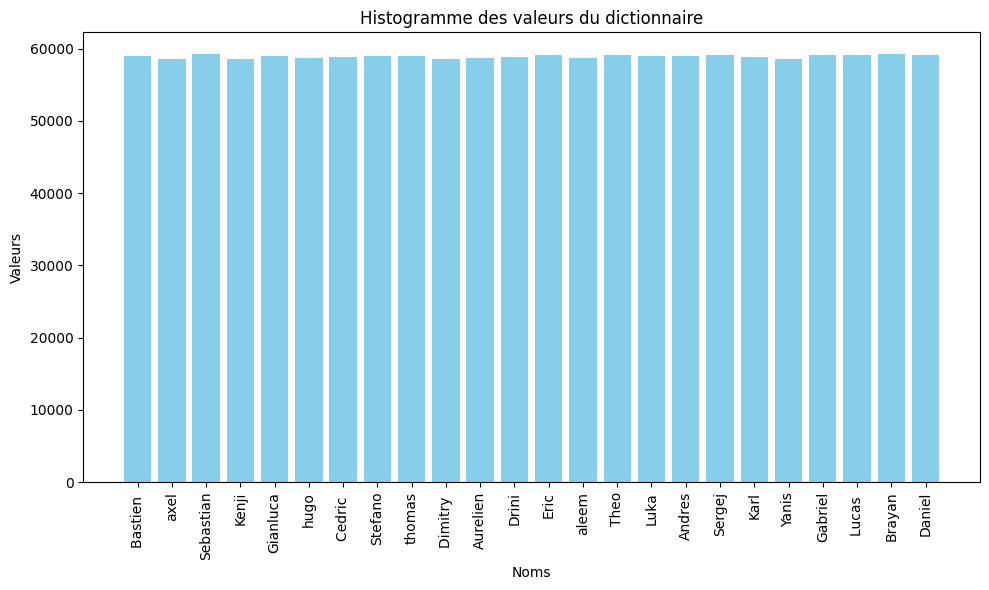

In [ ]:
import matplotlib.pyplot as plt

# Extraire les noms et les valeurs du dictionnaire
noms = list(dico_compteur.keys())
valeurs = list(dico_compteur.values())

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(noms, valeurs, color='skyblue')
plt.xlabel('Noms')
plt.ylabel('Valeurs')
plt.title('Histogramme des valeurs du dictionnaire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()